In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import os
from PIL import Image
import io  # Add this import for the 'io' module
from PIL import Image
import matplotlib as mpl
from matplotlib.colors import TwoSlopeNorm

In [48]:
def gaussian_with_noise(x, amplitude, center=0, stddev=1, noise_stddev=0.5):
    noise = np.random.normal(0, noise_stddev, len(x))
    return amplitude * np.exp(-((x - center) / stddev) ** 2) + noise

def plot_gaussian_curves_with_noise(amplitudes, center=0, stddev=1, noise_stddev=0.5):
    num_layers = len(amplitudes)

    # Generate x values
    x = np.linspace(-10, 10, 1000)

    # Initialize matrix to store generated data
    data_matrix = np.zeros((num_layers, len(x)))

    # Generate and plot Gaussian curves with noise
    for i, amplitude in enumerate(amplitudes):
        y = gaussian_with_noise(x, amplitude, center, stddev, noise_stddev)
        data_matrix[i] = y
        plt.plot(x, y)

    # Set plot labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Gaussian Curves with Noise')
    plt.legend()

    #Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


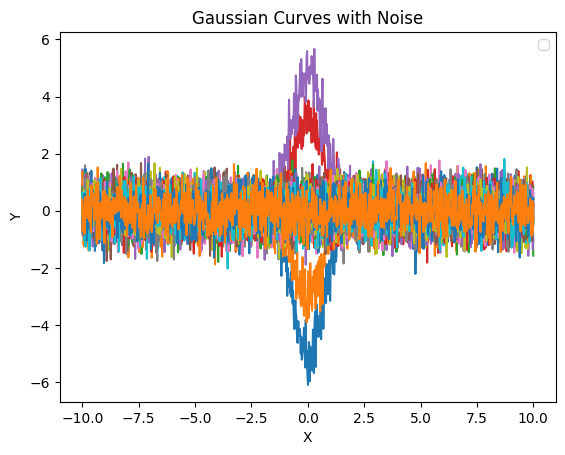

In [49]:
amplitude = [-5,-3,0,3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
plot_gaussian_curves_with_noise(amplitude)

In [62]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_with_noise(x, amplitude, center=0, stddev=1, noise_stddev=0.5):
    noise = np.random.normal(0, noise_stddev, len(x))
    return amplitude * np.exp(-((x - center) / stddev) ** 2) + noise

def plot_gaussian_curves_with_noise(amplitudes, center=0, stddev=1, noise_stddev=0.5, image_size=(10, 6)):
    num_layers = len(amplitudes)

    # Generate x values
    x = np.linspace(-10, 10, 1000)

    # Initialize matrix to store generated data
    data_matrix = np.zeros((num_layers, len(x)))

    # Generate Gaussian curves with noise and store in data_matrix
    for i, amplitude in enumerate(amplitudes):
        y = gaussian_with_noise(x, amplitude, center, stddev, noise_stddev)
        data_matrix[i] = y

    # Set the figure size
    plt.figure(figsize=image_size)

    # Plot Gaussian curves vertically in correct order (top to bottom)
    for i in range(num_layers):
        label = f'Layer-{i+1}'  # Layer index starts from 1 (not 0)
        plt.plot(x, data_matrix[num_layers - i - 1] + i * 3)

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Layer Signals')
    plt.title('Gaussian Curves with Noise')
    plt.yticks(np.arange(0, num_layers * 3, 3), [f'Layer-{num_layers-i}' for i in range(num_layers)])  # Set y-axis tick labels in correct order
    plt.legend()

    # Display the plot
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


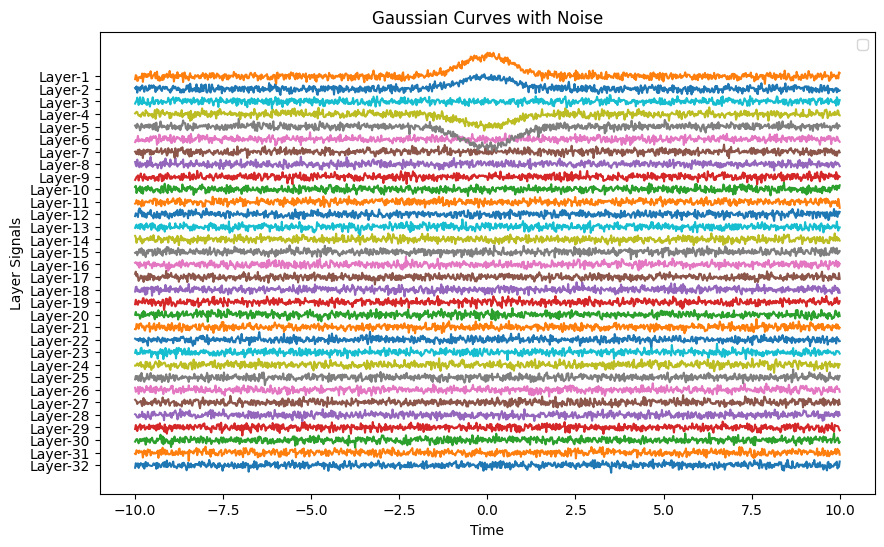

In [63]:
# Example usage
amplitudes = [5,3,0,-3,-5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]  # Replace with your desired amplitudes
plot_gaussian_curves_with_noise(amplitudes)

## Generating the siganl list test file

In [75]:
import numpy as np

def save_array(arr, filename):
    with open(filename, 'a') as f:
        f.write(','.join(map(str, arr)) + '\n')

# Initial array with 32 zeros
array_32_zeros = np.zeros(32, dtype=int)

# Smaller array containing [-5, -3, 0, 3, 5]
smaller_array = np.array([5, 3, 0, -3, -5])

# Iterate through the larger array and shift the smaller array with stride one
with open('results.txt', 'w') as f:
    for i in range(32 - len(smaller_array) + 1):
        array_32_zeros[:] = 0  # Reset all elements to 0
        array_32_zeros[i:i+len(smaller_array)] = smaller_array
        save_array(list(array_32_zeros), '/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/signal_array.txt')

## generating all images and saving as GIF

In [81]:
def gaussian_with_noise(x, amplitude, center=0, stddev=1, noise_stddev=0.5):
    noise = np.random.normal(0, noise_stddev, len(x))
    return amplitude * np.exp(-((x - center) / stddev) ** 2) + noise

def plot_gaussian_curves_with_noise(amplitudes, center=0, stddev=1, noise_stddev=0.5, image_size=(10, 6)):
    num_layers = len(amplitudes)

    # Generate x values
    x = np.linspace(-10, 10, 1000)

    # Initialize matrix to store generated data
    data_matrix = np.zeros((num_layers, len(x)))

    # Generate Gaussian curves with noise and store in data_matrix
    for i, amplitude in enumerate(amplitudes):
        y = gaussian_with_noise(x, amplitude, center, stddev, noise_stddev)
        data_matrix[i] = y

    # Set the figure size
    plt.figure(figsize=image_size)

    # Plot Gaussian curves vertically in correct order (top to bottom)
    for i in range(num_layers):
        label = f'Layer-{i+1}'  # Layer index starts from 1 (not 0)
        plt.plot(x, data_matrix[num_layers - i - 1] + i * 3)

    # Set plot labels and title
    plt.xlabel('Time')
    plt.ylabel('Layer Signals')
    plt.title('Gaussian Curves with Noise')
    plt.yticks(np.arange(0, num_layers * 3, 3), [f'Layer-{num_layers-i}' for i in range(num_layers)])  # Set y-axis tick labels in correct order


    # Convert the plot to an image object
    buffer = io.BytesIO()
    plt.savefig(buffer, format='png')
    buffer.seek(0)
    image = Image.open(buffer)
    
    # Close the plot to release memory
    plt.close()
    
    # Return the image object
    return image

In [82]:
def read_arrays_from_file(filename):
    with open(filename, 'r') as file:
        data = file.readlines()
        arrays = [eval(array_str.strip()) for array_str in data]
    return arrays

In [83]:
# Read the arrays from the text file
arrays = read_arrays_from_file("/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/signal_array.txt")
len(arrays)

28

In [84]:
def save_image(array, index, output_folder):
    # Generate the image from the array using plot_gaussian_curves_with_noise
    image = plot_gaussian_curves_with_noise(array)

    # Save the image to the output folder with a specific filename
    image_path = os.path.join(output_folder, f"signal_{index}.png")
    image.save(image_path)

In [85]:
def main():
    # Read the arrays from the text file
    with open("/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/signal_array.txt", 'r') as file:
        data = file.readlines()
        arrays = [eval(array_str.strip()) for array_str in data]

    # Create the output folder if it doesn't exist
    output_folder = "/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/signal_images"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Loop through the arrays, generate and save the images
    for i, array in enumerate(arrays):
        save_image(array, i, output_folder)

In [86]:
if __name__ == "__main__":
    main()

## GIF Plot

In [87]:
# Function to create GIF from images in a folder
def create_gif(folder_path, output_gif_path, duration=200):
    images = []
    
    # Load all images from the folder
    for i in range(1, 29):  # Assuming you have images named from image_1 to image_28
        image_path = os.path.join(folder_path, f"signal_{i}.png")  # Modify the file extension if needed
        if os.path.exists(image_path):
            images.append(Image.open(image_path))

    # Save as GIF
    images[0].save(
        output_gif_path,
        save_all=True,
        append_images=images[1:],
        duration=duration,
        loop=0,
        format="GIF"  # Specify the format explicitly
    )


In [88]:
if __name__ == "__main__":
    # Set the paths accordingly
    folder_path = "/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/signal_images/"
    output_gif_path = "/home/smaiti/Danc_lab/Final_Experiments/python_notebook/32_layer_data/gif_file/32_layer_signal_gif.gif"
    create_gif(folder_path, output_gif_path)